<a href="https://colab.research.google.com/github/tahamsi/tahamsi/blob/main/Topic_Modeling_with_LDA_and_NMF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html#sphx-glr-auto-examples-applications-plot-topics-extraction-with-nmf-lda-py
from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [ ]:
# Data processing
import pandas as pd
import numpy as np
# Text preprocessiong
import nltk
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('wordnet')
wn = nltk.WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
"""
from io import BytesIO
from zipfile import ZipFile
import urllib.request
    
url = urllib.request.urlopen("https://github.com/Ali-Alameer/NLP/raw/main/data/NIPS%20Papers.zip")

with ZipFile(BytesIO(url.read())) as my_zip_file:
    temp = my_zip_file.open('NIPS Papers/papers.csv')
"""
pr_cancer_papers = pd.read_excel("test.xls")

# Print head
pr_cancer_papers.head()

,Article Title,Source Title,Author Keywords,Abstract,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",Publisher,Publisher City,Publication Year,DOI,DOI Link,Research Areas
0,Computer vision detects subtle histological ef...,BJU INTERNATIONAL,dutasteride; computer vision; digital image an...,ObjectiveTo determine whether a computer visio...,20,1,1,WILEY,HOBOKEN,2018.0,10.1111/bju.14172,http://dx.doi.org/10.1111/bju.14172,Urology & Nephrology
1,Prostate cancer prediction from multiple pretr...,HEALTH AND TECHNOLOGY,Prostate cancer; Deep learning; MobileNet; Den...,The prostate gland found among men is a male r...,36,0,0,SPRINGER HEIDELBERG,HEIDELBERG,2021.0,10.1007/s12553-021-00586-y,http://dx.doi.org/10.1007/s12553-021-00586-y,Medical Informatics
2,The assessment of deep learning computer visio...,ANNALS OF CLINICAL AND ANALYTICAL MEDICINE,Prostate; Adenocarcinoma; Deep learning; Compu...,"Aim: In this study, we aimed to evaluate the e...",21,0,0,BAYRAKOL MEDICAL PUBLISHER,ANKARA,2021.0,10.4328/ACAM.20322,http://dx.doi.org/10.4328/ACAM.20322,General & Internal Medicine
3,Construction of a Repeatable Framework for Pro...,INTERNATIONAL JOURNAL OF ADVANCED COMPUTER SCI...,Convolutional neural networks; binary semantic...,Prostate cancer is the 3rd most diagnosed canc...,27,0,0,SCIENCE & INFORMATION SAI ORGANIZATION LTD,WEST YORKSHIRE,2022.0,NaN,NaN,Computer Science
4,Development of a Deep Learning Algorithm for t...,EUROPEAN UROLOGY FOCUS,Machine learning; Deep learning; Prostate canc...,Background: The pathologic diagnosis and Gleas...,22,17,18,ELSEVIER,AMSTERDAM,2021.0,10.1016/j.euf.2019.11.003,http://dx.doi.org/10.1016/j.euf.2019.11.003,Urology & Nephrology


In [ ]:
pr_cancer_papers.head()

,Article Title,Source Title,Author Keywords,Abstract,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",Publisher,Publisher City,Publication Year,DOI,DOI Link,Research Areas
0,Computer vision detects subtle histological ef...,BJU INTERNATIONAL,dutasteride; computer vision; digital image an...,ObjectiveTo determine whether a computer visio...,20,1,1,WILEY,HOBOKEN,2018.0,10.1111/bju.14172,http://dx.doi.org/10.1111/bju.14172,Urology & Nephrology
1,Prostate cancer prediction from multiple pretr...,HEALTH AND TECHNOLOGY,Prostate cancer; Deep learning; MobileNet; Den...,The prostate gland found among men is a male r...,36,0,0,SPRINGER HEIDELBERG,HEIDELBERG,2021.0,10.1007/s12553-021-00586-y,http://dx.doi.org/10.1007/s12553-021-00586-y,Medical Informatics
2,The assessment of deep learning computer visio...,ANNALS OF CLINICAL AND ANALYTICAL MEDICINE,Prostate; Adenocarcinoma; Deep learning; Compu...,"Aim: In this study, we aimed to evaluate the e...",21,0,0,BAYRAKOL MEDICAL PUBLISHER,ANKARA,2021.0,10.4328/ACAM.20322,http://dx.doi.org/10.4328/ACAM.20322,General & Internal Medicine
3,Construction of a Repeatable Framework for Pro...,INTERNATIONAL JOURNAL OF ADVANCED COMPUTER SCI...,Convolutional neural networks; binary semantic...,Prostate cancer is the 3rd most diagnosed canc...,27,0,0,SCIENCE & INFORMATION SAI ORGANIZATION LTD,WEST YORKSHIRE,2022.0,NaN,NaN,Computer Science
4,Development of a Deep Learning Algorithm for t...,EUROPEAN UROLOGY FOCUS,Machine learning; Deep learning; Prostate canc...,Background: The pathologic diagnosis and Gleas...,22,17,18,ELSEVIER,AMSTERDAM,2021.0,10.1016/j.euf.2019.11.003,http://dx.doi.org/10.1016/j.euf.2019.11.003,Urology & Nephrology


In [ ]:
# Remove stopwords
stopwords = nltk.corpus.stopwords.words('english')

In [ ]:
# Remove stopwords
pr_cancer_papers['abstract_without_stopwords'] = pr_cancer_papers['Abstract'].apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in stopwords]))
# Lemmatization
pr_cancer_papers['abstract_lemmatized'] = pr_cancer_papers['abstract_without_stopwords'].apply(lambda x: ' '.join([wn.lemmatize(w) for w in x.split() if w not in stopwords]))
# Take a look at the data
pr_cancer_papers.head()

,Article Title,Source Title,Author Keywords,Abstract,Cited Reference Count,"Times Cited, WoS Core","Times Cited, All Databases",Publisher,Publisher City,Publication Year,DOI,DOI Link,Research Areas,abstract_without_stopwords,abstract_lemmatized
0,Computer vision detects subtle histological ef...,BJU INTERNATIONAL,dutasteride; computer vision; digital image an...,ObjectiveTo determine whether a computer visio...,20,1,1,WILEY,HOBOKEN,2018.0,10.1111/bju.14172,http://dx.doi.org/10.1111/bju.14172,Urology & Nephrology,ObjectiveTo determine whether computer vision-...,ObjectiveTo determine whether computer vision-...
1,Prostate cancer prediction from multiple pretr...,HEALTH AND TECHNOLOGY,Prostate cancer; Deep learning; MobileNet; Den...,The prostate gland found among men is a male r...,36,0,0,SPRINGER HEIDELBERG,HEIDELBERG,2021.0,10.1007/s12553-021-00586-y,http://dx.doi.org/10.1007/s12553-021-00586-y,Medical Informatics,prostate gland found among men male reproducti...,prostate gland found among men male reproducti...
2,The assessment of deep learning computer visio...,ANNALS OF CLINICAL AND ANALYTICAL MEDICINE,Prostate; Adenocarcinoma; Deep learning; Compu...,"Aim: In this study, we aimed to evaluate the e...",21,0,0,BAYRAKOL MEDICAL PUBLISHER,ANKARA,2021.0,10.4328/ACAM.20322,http://dx.doi.org/10.4328/ACAM.20322,General & Internal Medicine,"Aim: study, aimed evaluate effectiveness artif...","Aim: study, aimed evaluate effectiveness artif..."
3,Construction of a Repeatable Framework for Pro...,INTERNATIONAL JOURNAL OF ADVANCED COMPUTER SCI...,Convolutional neural networks; binary semantic...,Prostate cancer is the 3rd most diagnosed canc...,27,0,0,SCIENCE & INFORMATION SAI ORGANIZATION LTD,WEST YORKSHIRE,2022.0,NaN,NaN,Computer Science,Prostate cancer 3rd diagnosed cancer overall. ...,Prostate cancer 3rd diagnosed cancer overall. ...
4,Development of a Deep Learning Algorithm for t...,EUROPEAN UROLOGY FOCUS,Machine learning; Deep learning; Prostate canc...,Background: The pathologic diagnosis and Gleas...,22,17,18,ELSEVIER,AMSTERDAM,2021.0,10.1016/j.euf.2019.11.003,http://dx.doi.org/10.1016/j.euf.2019.11.003,Urology & Nephrology,Background: pathologic diagnosis Gleason gradi...,Background: pathologic diagnosis Gleason gradi...


In [ ]:
n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"

In [ ]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [ ]:
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tfidf = tfidf_vectorizer.fit_transform(pr_cancer_papers['abstract_lemmatized'])

Extracting tf-idf features for NMF...


In [ ]:
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
tf = tf_vectorizer.fit_transform(pr_cancer_papers['abstract_lemmatized'])

Extracting tf features for LDA...


Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...


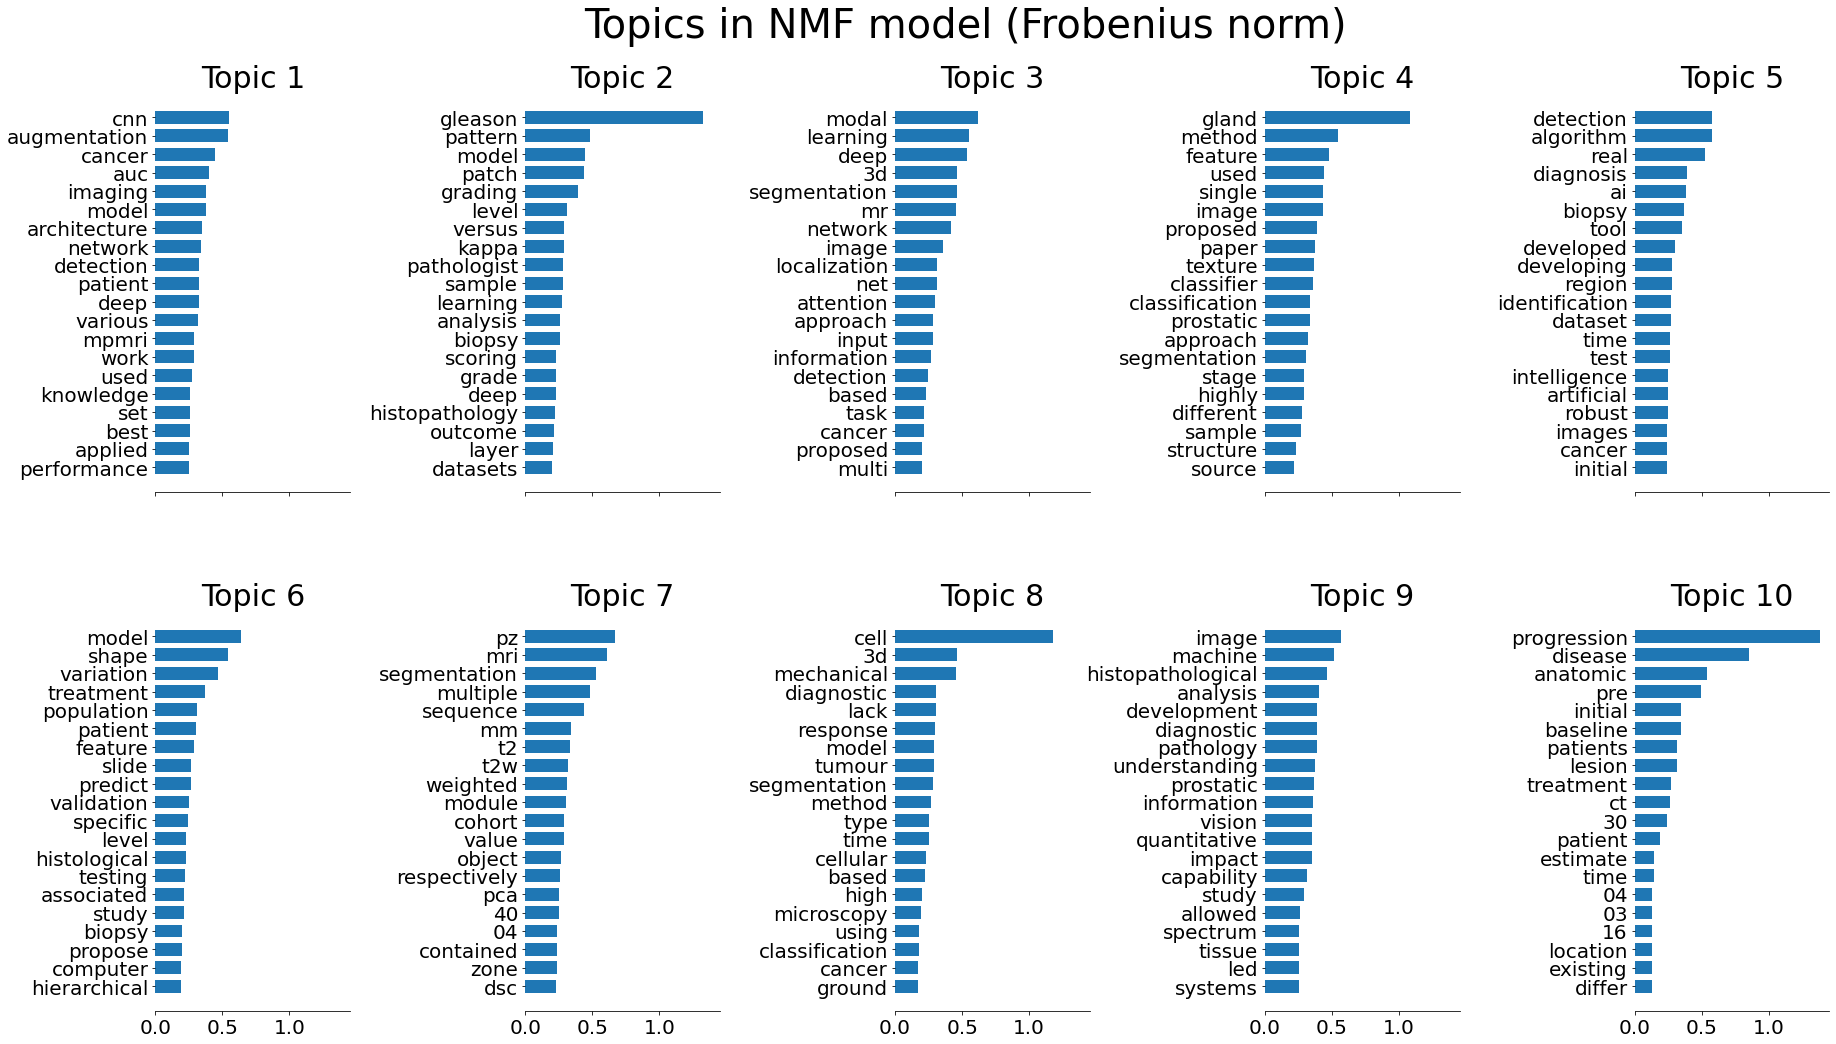

In [ ]:
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tfidf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


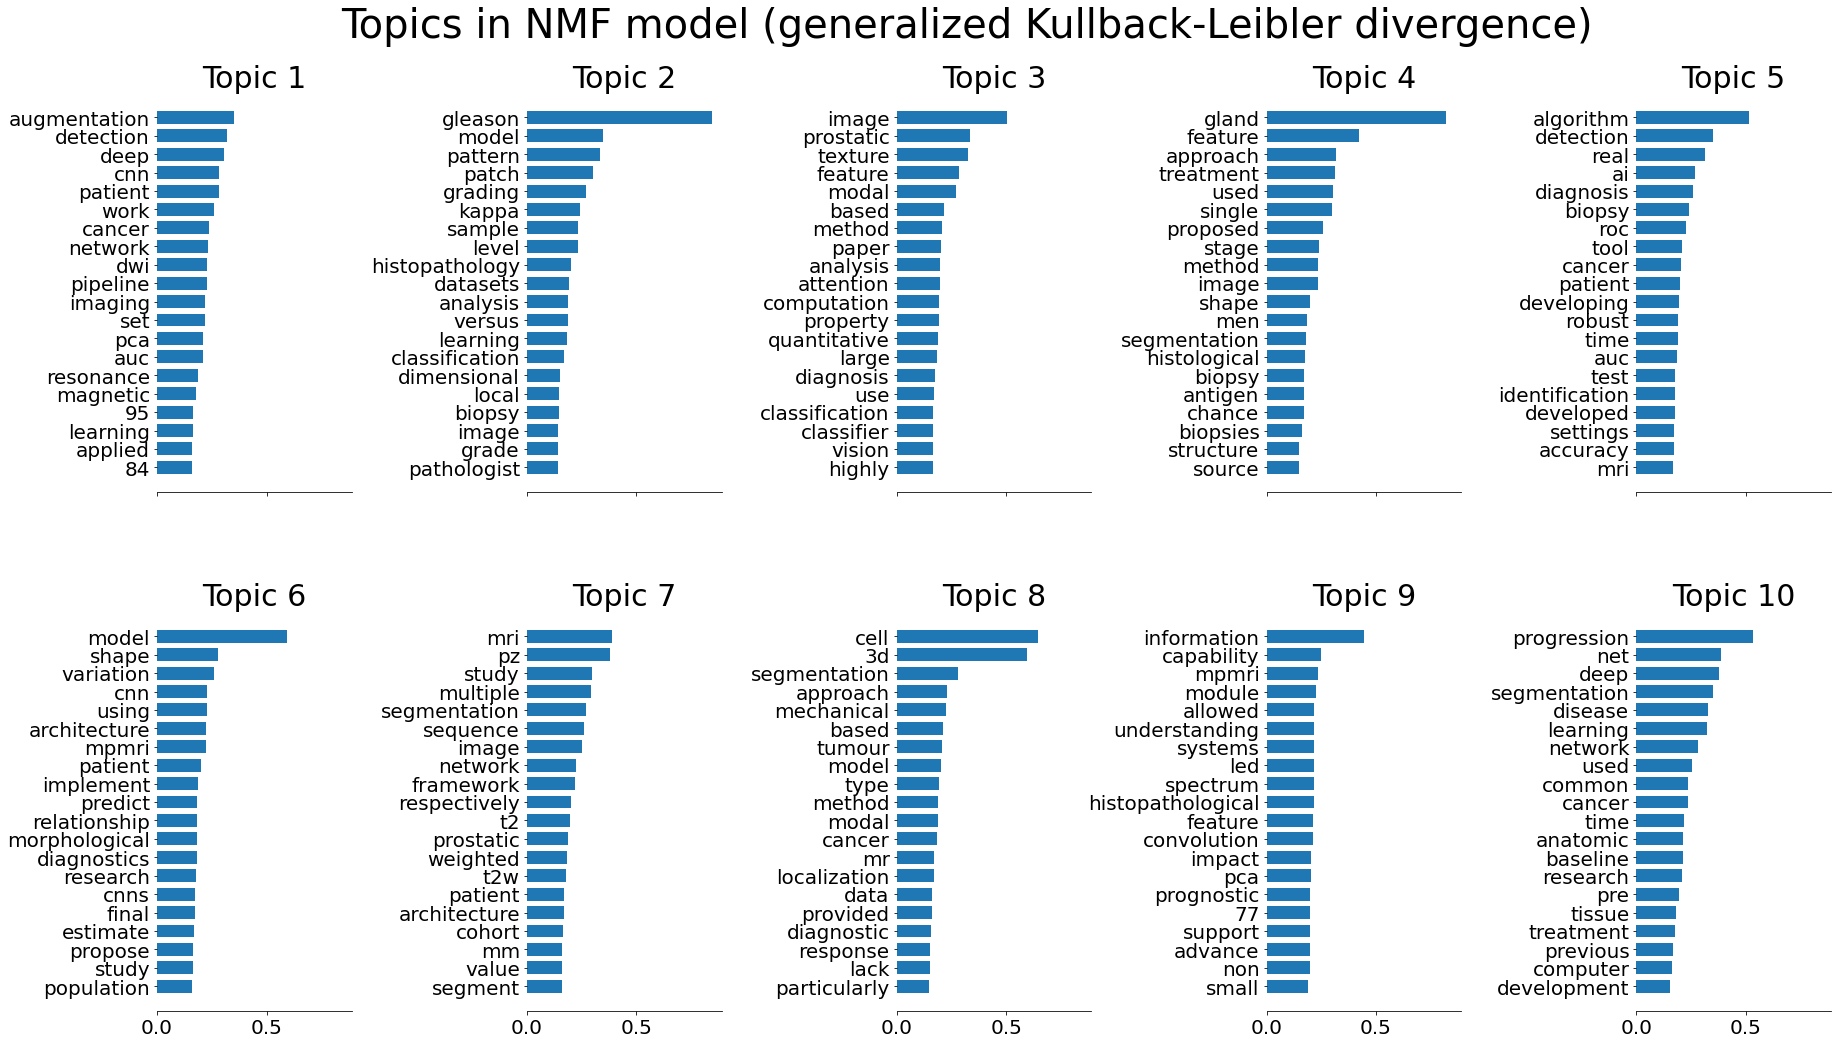

In [ ]:
# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tfidf)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

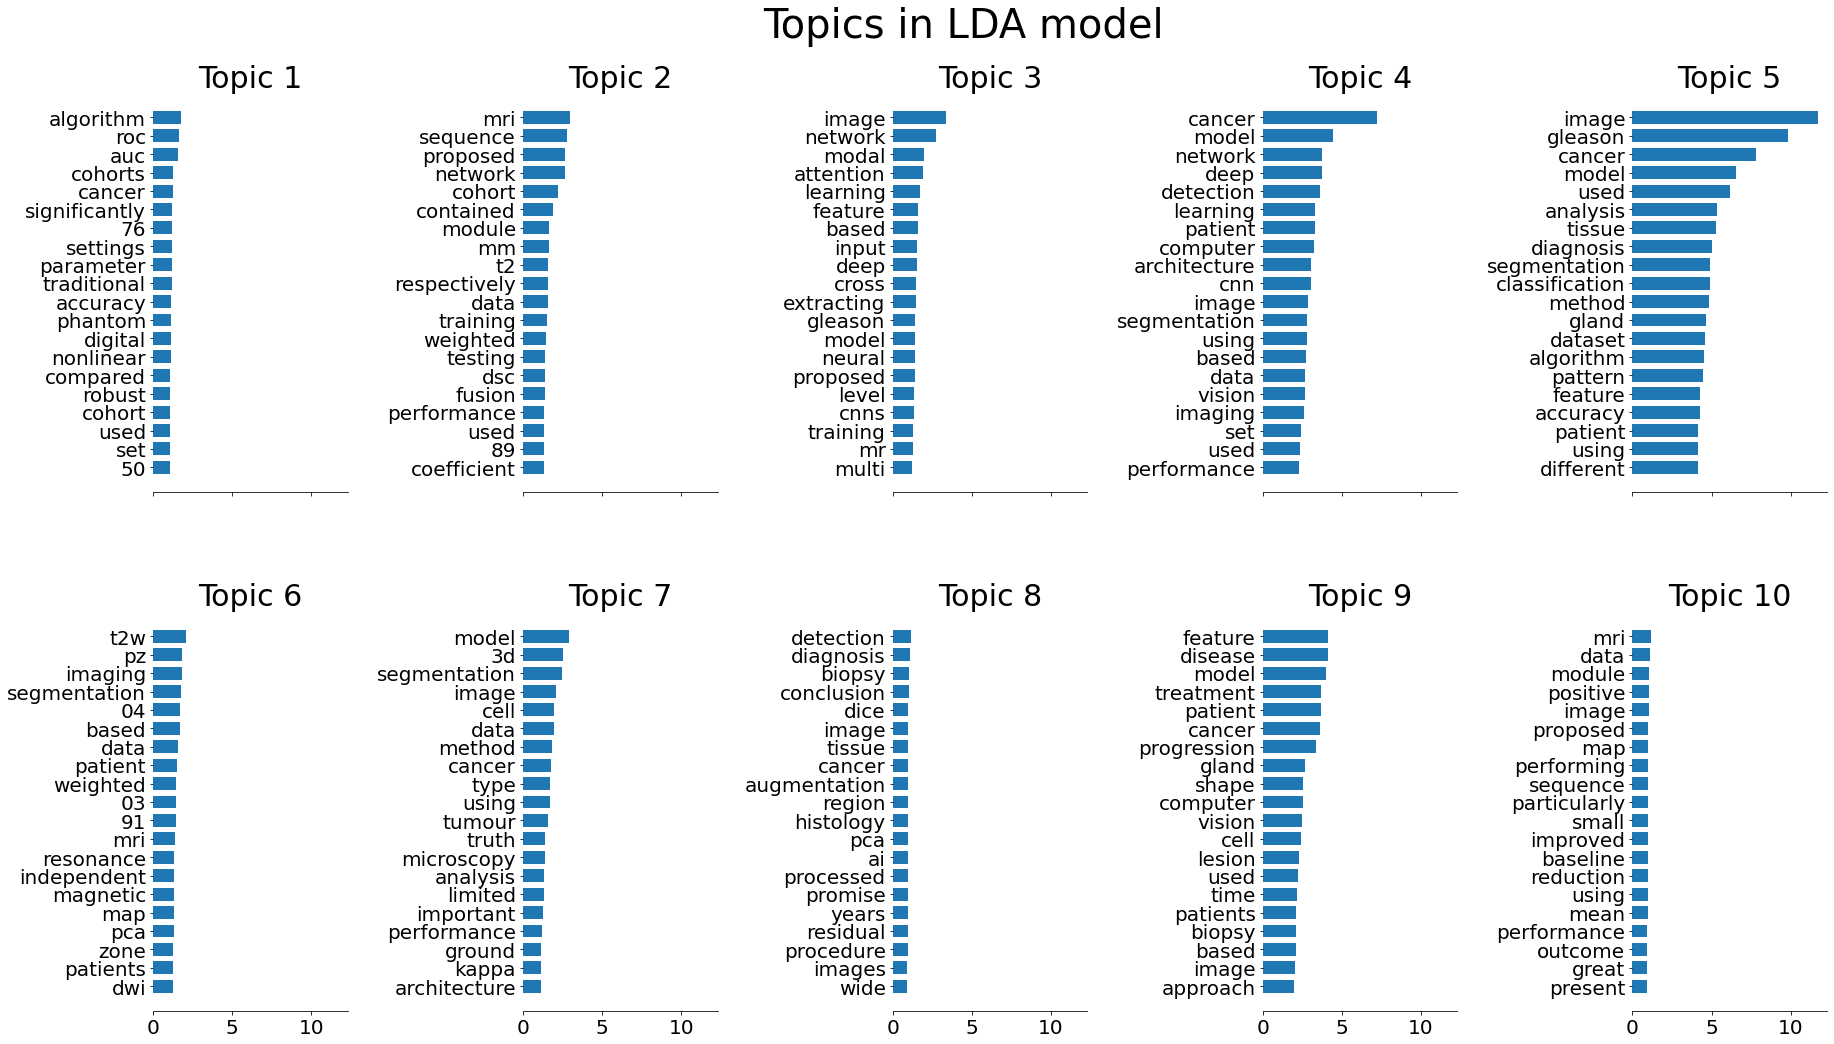

In [ ]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(tf)
tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")